In [1]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2021-10-20 12:26:50.953710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xox/catkin_ws/devel/lib:/opt/ros/noetic/lib
2021-10-20 12:26:50.968435: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Setting image storage variables anf getting the train directory path

data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)

/home/xox/Projects/GRiP/5 - TSC


In [6]:
# Making training image lists

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '//' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")    

In [7]:
# Converting lists using numpy array to be processed

data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
# Converting class vectors to binary class matrix

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
# Specifying the model

model =Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))

# We have 43 classes that's why we have defined 43 in the dense 
model.add(Dense(43, activation='softmax'))

In [16]:
# Compilation of the model
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 15 
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 217s 220ms/step - loss: 1.7139 - accuracy: 0.5708 - val_loss: 0.3511 - val_accuracy: 0.9128
Epoch 2/15
981/981 [==============================] - 186s 189ms/step - loss: 0.4837 - accuracy: 0.8625 - val_loss: 0.2491 - val_accuracy: 0.9365
Epoch 3/15
981/981 [==============================] - 195s 199ms/step - loss: 0.3348 - accuracy: 0.9052 - val_loss: 0.1012 - val_accuracy: 0.9741
Epoch 4/15
981/981 [==============================] - 189s 192ms/step - loss: 0.2657 - accuracy: 0.9250 - val_loss: 0.0669 - val_accuracy: 0.9834
Epoch 5/15
981/981 [==============================] - 202s 206ms/step - loss: 0.2197 - accuracy: 0.9384 - val_loss: 0.0595 - val_accuracy: 0.9839
Epoch 6/15
981/981 [==============================] - 184s 187ms/step - loss: 0.2277 - accuracy: 0.9389 - val_loss: 0.1469 - val_accuracy: 0.9573
Epoch 7/15
981/981 [==============================] - 180s 184ms/step - loss: 0.2207 - accuracy: 0.9407 - val_loss: 0.0735 -

In [17]:
# Saving out finished model

model.save("model.h5")

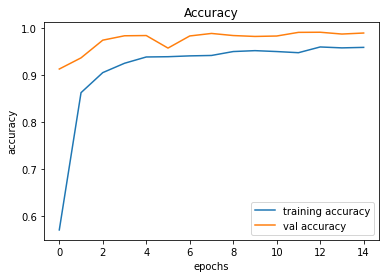

In [18]:
# Plotting graphs for accuracy 
 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

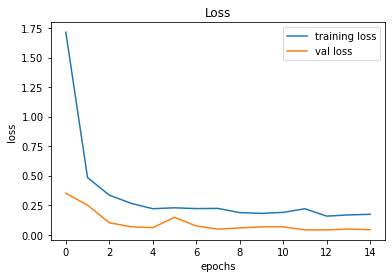

In [19]:
# Plotting graphs for loss

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
# Testing the model on test dataset

from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
classes = np.argmax(pred, axis=1)

In [30]:
# Accuracy with the test data

from sklearn.metrics import accuracy_score
print(f'Accuracy: {round(accuracy_score(labels, classes)*100, 2)}%')

Accuracy: 96.04%


# Now we will test our model using a Flask app